# Load Pickle Data

In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
filenames = {'female':'female_heatmaps.pkl', 'male':'male_heatmaps.pkl'}

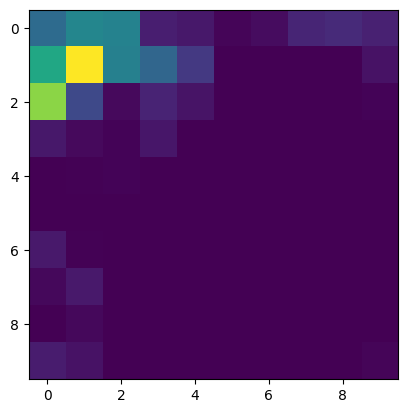

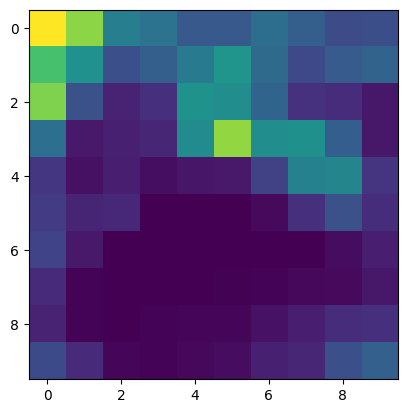

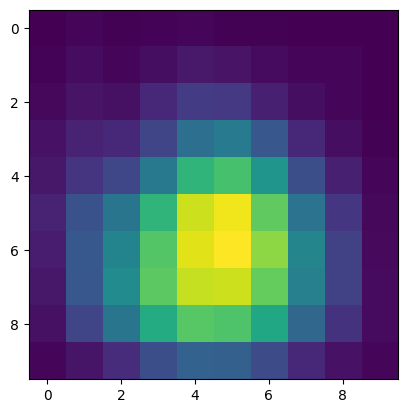

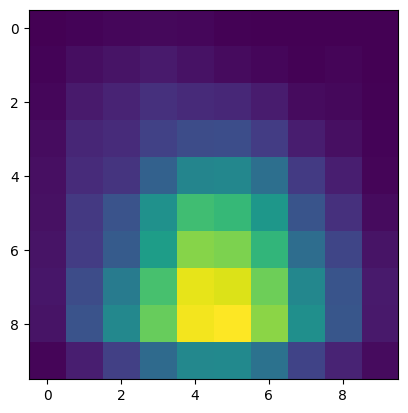

In [23]:
female_file = open(filenames['female'], 'rb')
female_heatmaps = pickle.load(female_file)

female_heatmap_list = []

for idx, heatmap in enumerate(female_heatmaps):
    arr = np.array(heatmap)
    
    img = np.resize(arr, (10,10))

    plt.imshow(img)
    plt.show()
    
    female_heatmap_list.append(img)

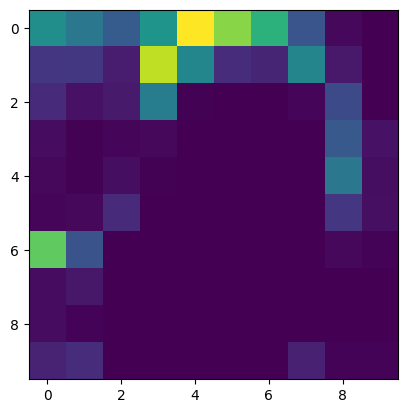

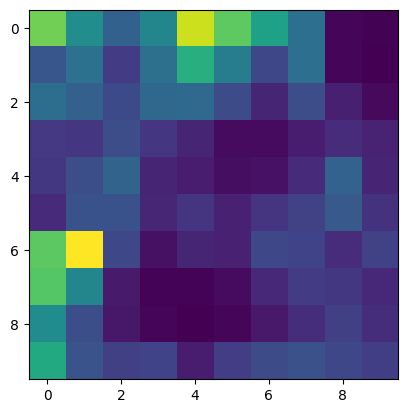

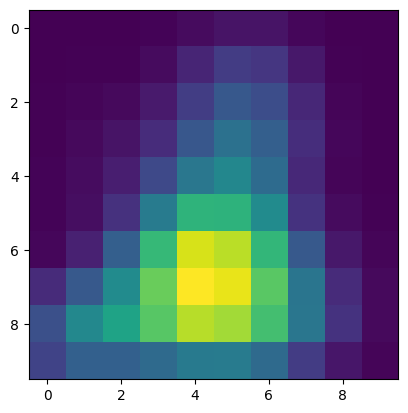

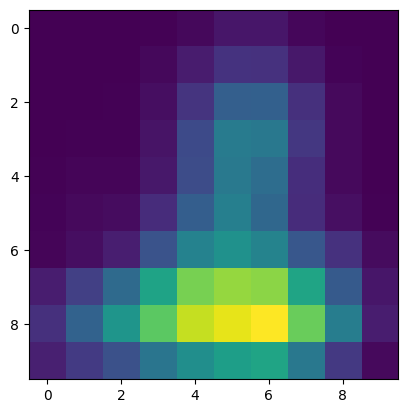

In [24]:
male_file = open(filenames['male'], 'rb')
male_heatmaps = pickle.load(male_file)

male_heatmap_list = []

for idx, heatmap in enumerate(male_heatmaps):
    arr = np.array(heatmap)
    
    img = np.resize(arr, (10,10))
    plt.imshow(img)
    plt.show()
    
    male_heatmap_list.append(img)

# CV2 subtract method

In [25]:
import cv2 

In [30]:
female_heatmaps[0]

[array([[0.25046352, 0.3292978 , 0.31724846, 0.05938486, 0.04593313,
         0.01071858, 0.02380523, 0.07335393, 0.08622668, 0.06464059],
        [0.42573144, 0.71648489, 0.31072562, 0.23673816, 0.11792237,
         0.        , 0.        , 0.        , 0.        , 0.03359883],
        [0.59232826, 0.15711931, 0.01838536, 0.07229823, 0.03898163,
         0.        , 0.        , 0.        , 0.        , 0.00762333],
        [0.04686523, 0.0181384 , 0.00635586, 0.04423776, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.00376894, 0.00740175, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.04761905, 0.00409196, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.01481555, 0.0476

0


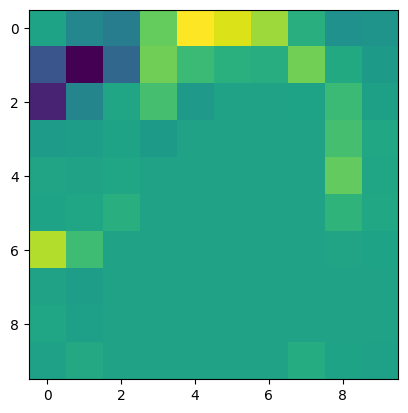

1


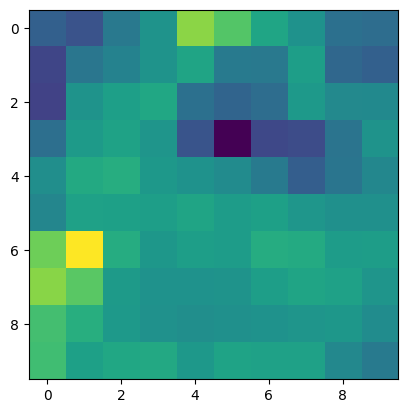

2


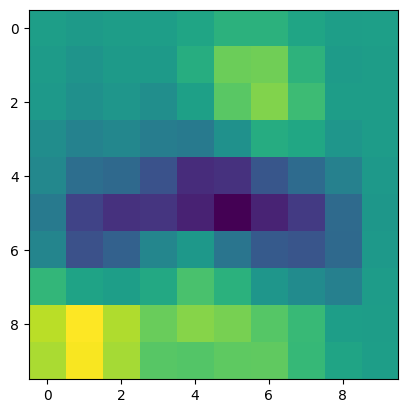

3


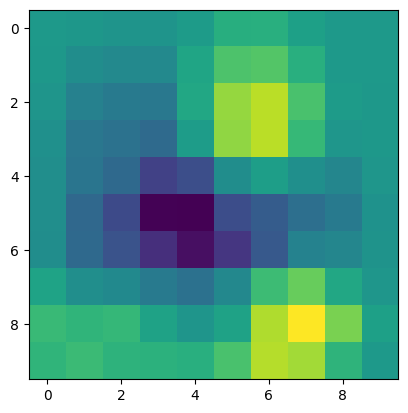

In [35]:
difference_maps = []
for idx, (fmap, mmap) in enumerate(zip(female_heatmap_list, male_heatmap_list)):
    print(idx)
    
    diff = cv2.subtract(mmap, fmap)
    
    difference_maps.append(diff)
    
    plt.imshow(diff)
    plt.show()

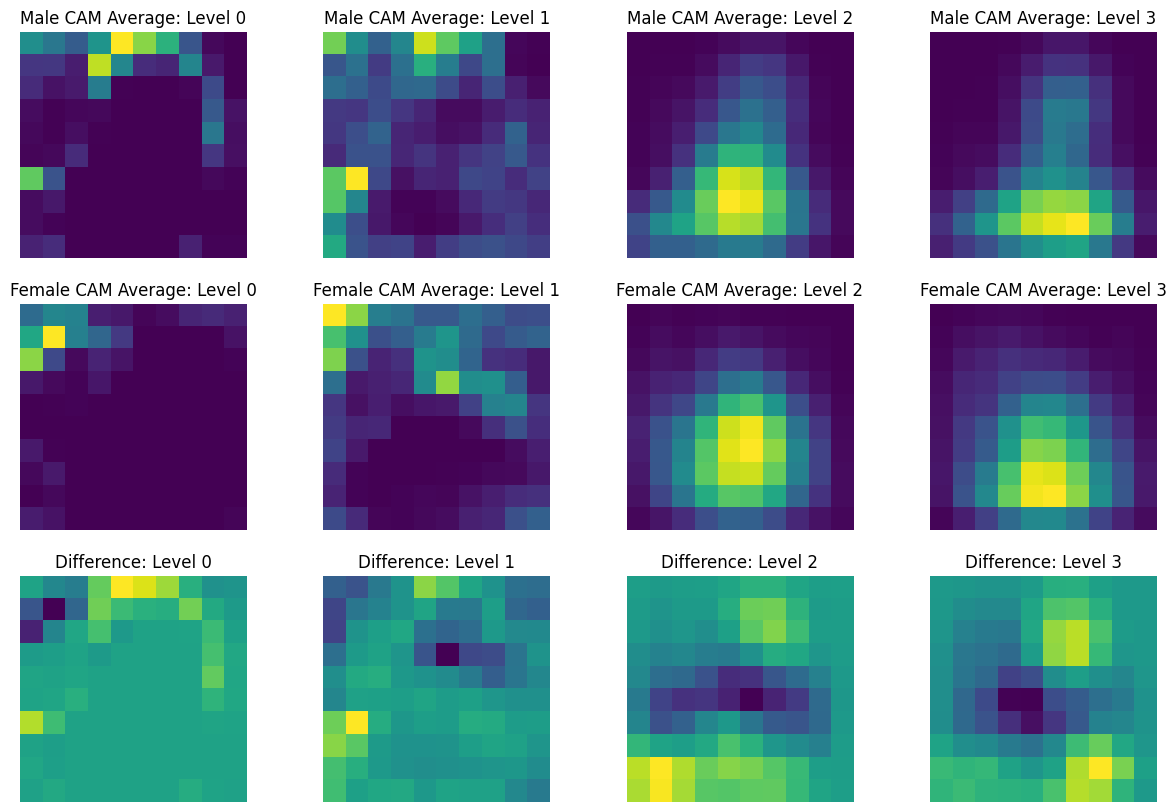

In [42]:
fig = plt.figure(figsize=(15, 10))
rows = 3
columns = 4

#for idx, (fmap, mmap, dmap) in enumerate(zip(female_heatmap_list, male_heatmap_list, difference_maps)):
    
image_list = male_heatmap_list + female_heatmap_list + difference_maps
labels = []
for idx in range(4):
    labels.append(f'Male CAM Average: Level {idx}')
for idx in range(4):
    labels.append(f'Female CAM Average: Level {idx}')
for idx in range(4):
    labels.append(f'Difference: Level {idx}')
    
for index, (sample, label) in enumerate(zip(image_list,labels)):
    fig.add_subplot(rows, columns, index+1)
    plt.imshow(sample)
    plt.axis('off')
    plt.title(f'{label}')